In [1]:
import numpy as np
import timecorr as tc
import seaborn as sns
import os
from matplotlib import pyplot as plt

%matplotlib inline

SMALL_SIZE = 18
MEDIUM_SIZE = 21
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
figdir = '../figs'

In [3]:
def plot_weights(weights, t=None, color='k', ax=None, xlab='Time (samples)', linewidth=2, ylab='Weights', title=None):
    T = weights.shape[0]
    if t is None:
        t = np.round(T/2)
    ts = np.arange(1, T+1)
    
    if ax is None:
        ax = plt.gca()
    
    ax.plot(ts, weights[int(t), :], color=color, linewidth=linewidth)
    plt.xlim([1, T])
    
    if not (xlab is None):
        plt.xlabel(xlab)
    
    if not (ylab is None):
        plt.ylabel(ylab)
    
    if not (title is None):
        plt.title(title)        

In [4]:
T = 100 #number of timepoints
ts = np.arange(1, T+1)
t = 50

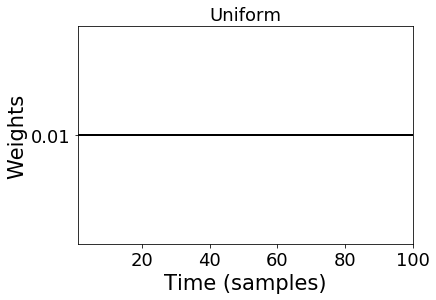

In [5]:
#uniform weights
plot_weights((1 / T) * np.ones([T, T]), title='Uniform')
plt.yticks([0.01])
plt.savefig(os.path.join(figdir, 'Uniform.pdf'), transparent=True)

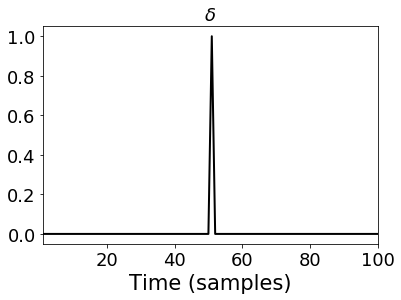

In [6]:
#delta function weights
plot_weights(tc.eye_weights(T), title='$\delta$', ylab=None)
plt.savefig(os.path.join(figdir, 'Delta.pdf'), transparent=True)

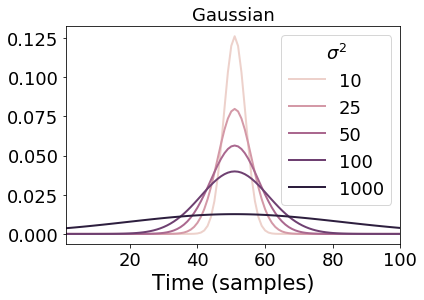

In [7]:
#gaussian function weights
sigmas = [10, 25, 50, 100, 1000]
colors = sns.cubehelix_palette(n_colors=len(sigmas))
for i, s in enumerate(sigmas):
    plot_weights(tc.gaussian_weights(T, {'var': s}), color=colors[i], ylab=None, title='Gaussian')
plt.legend(sigmas, title='$\sigma^2$')
plt.savefig(os.path.join(figdir, 'Gaussian.pdf'), transparent=True)

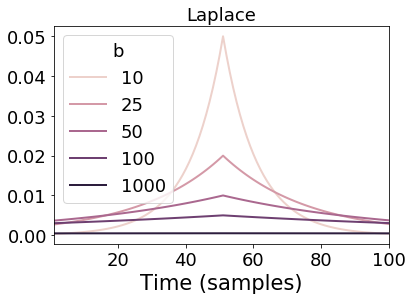

In [8]:
#laplace function weights
scales = [10, 25, 50, 100, 1000]
colors = sns.cubehelix_palette(n_colors=len(scales))
for i, s in enumerate(scales):
    plot_weights(tc.laplace_weights(T, {'scale': s}), color=colors[i], ylab=None, title='Laplace')
plt.legend(sigmas, title='b')
plt.savefig(os.path.join(figdir, 'Laplace.pdf'), transparent=True)

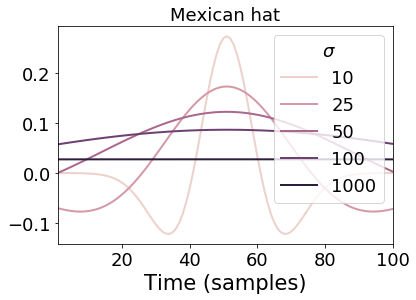

In [9]:
#mexican hat function weights
sigmas = [10, 25, 50, 100, 1000]
colors = sns.cubehelix_palette(n_colors=len(sigmas))
for i, s in enumerate(sigmas):
    plot_weights(tc.mexican_hat_weights(T, {'sigma': s}), color=colors[i], ylab=None, title='Mexican hat')
plt.legend(sigmas, title='$\sigma$')
plt.savefig(os.path.join(figdir, 'MexicanHat.pdf'), transparent=True)

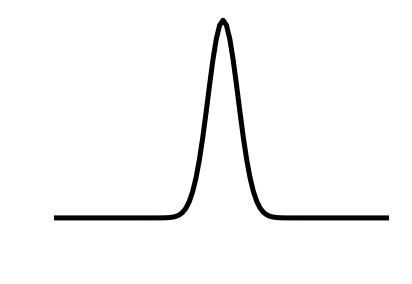

In [10]:
#gaussian function 
plot_weights(tc.gaussian_weights(T, {'var': 20}), color='k', linewidth=5, ylab=None, title=None)
plt.axis('off')
plt.savefig(os.path.join(figdir, 'Gaussian_example.pdf'), transparent=True)

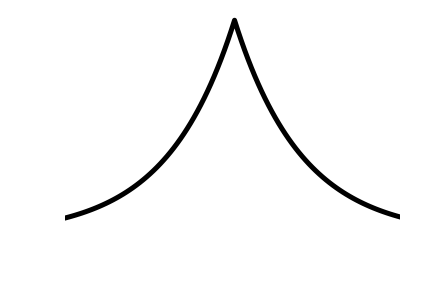

In [11]:
#laplace function 
plot_weights(tc.laplace_weights(T, {'scale': 20}), color='k', linewidth=5, ylab=None, title=None)
plt.axis('off')
plt.savefig(os.path.join(figdir, 'Laplace_example.pdf'), transparent=True)

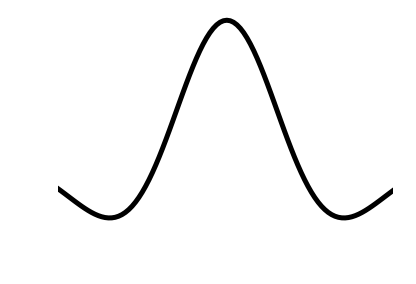

In [12]:
#gaussian function weight
plot_weights(tc.mexican_hat_weights(T, {'sigma': 20}), color='k', linewidth=5, ylab=None, title=None)
plt.axis('off')
plt.savefig(os.path.join(figdir, 'Mexican_hat_example.pdf'), transparent=True)

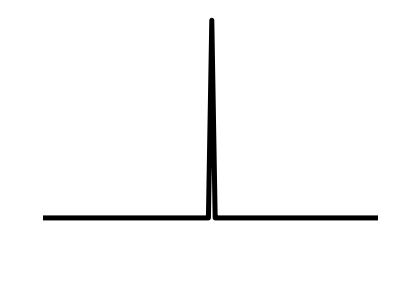

In [14]:
#delta function weights
plot_weights(tc.eye_weights(T), linewidth=5, ylab=None, title=None)
plt.axis('off')
plt.savefig(os.path.join(figdir, 'Delta_example.pdf'), transparent=True)